In [184]:
import pylab
import matplotlib.pyplot as plt 
%matplotlib inline

spectral_lines = [3934.3, 3967.6, 6561.8] #CaK, CaH, Halpha

def recvel(m): #recessional velocity
    # m is an array of the lines in order accross screen
    z_array = np.zeros([len(spectral_lines)])
    for i,_ in enumerate(m):
        z_array[i]=(m[i]-spectral_lines[i])/spectral_lines[i]
    vel_av = np.median(z_array)
    vel_std = np.std(z_array)
    return (vel_av)*300000, (vel_std)*300000

def distance(f): #distance to galaxies
    d_array = []
    for i in f:
        d_array.append(22./i)
    d_av = np.mean(d_array)
    d_std = np.std(d_array)    
    return d_av, d_std #+ d_av*0.10

def v(data): #vector of the data
    f,m = data
    dist = distance(f)
    vel = recvel(m)
    return [dist[0],vel[0],dist[1],vel[1]] #distance, velocity, std_distance, std_velocity

import numpy as np

In [186]:
#formatted [[3 measurements of radius],[3 redshifts (one for each absorption and emmission spectra)]]
data = [[[0.453,0.447,0.349],[3962.9,3997.8,6609.0]],
 [[0.584,0.461,0.541],[3961.4,3996.2,6607.5]],
 [[0.607, 0.659,0.690],[3966.0,3998.6, 6615.2]],
 [[1.725,1.597,1.570],[3938.9, 3973.8,6574.9]],
 [[0.543,0.449,0.577],[ 3968.4,4005.5,6623.0]],
 [[0.744,0.761, 0.765],[3949.0,3984.6 ,6590.4]],
 [[0.881,0.933,0.897],[3946.7,3980.7,6583.5]],
 [[2.033,1.969,1.977],[3939.7,3977.6,6578.8]],
[[1.611,1.606,1.560],[3942.8 ,3978.4,6578.8]],
        [[0.545,0.535,0.567],[3958.3,3990.0,6596.6]],
        [[0.779,0.707,0.665],[3946.7,3982.3,6585.8]],
        [[0.440,0.430,0.400],[3964.5,3998.6,6611.3]]
]

In [187]:
to_plot = [] #initializing final data array (with things to plot)
for i in data:
    to_plot.append(v(i)) #processing each row of data
tp = np.array(to_plot)

(0, 80)

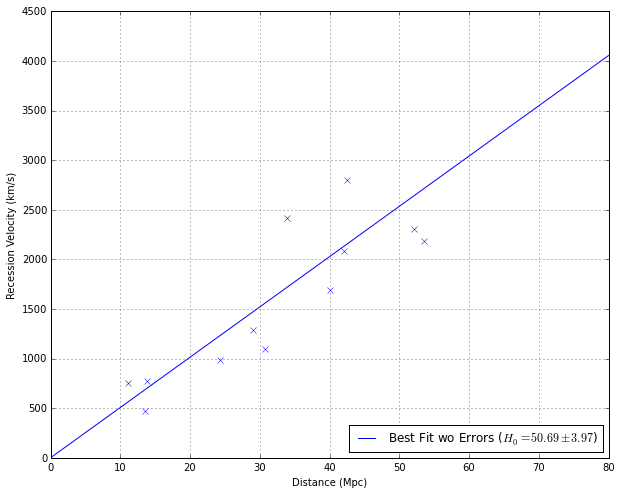

In [242]:
plt.grid()
plt.xlabel("Distance (Mpc)") #x axis label 
plt.ylabel("Recession Velocity (km/s)") #y axis label 
#plt.plot(np.power(10,data_sn[:,2]/5)/10000000,data_sn[:,1]*3000,"g.",markersize=1.5,label="Supernovas")

plt.plot(tp[:,0],tp[:,1], "bx")
plt.plot([0,80],np.array([0,80])*50.69,label="Best Fit wo Errors ($H_0 = 50.69 \pm 3.97$)")
plt.rcParams['figure.figsize'] = (10.0, 8.0) #makes plot bigger!
plt.legend(loc=4)
plt.xlim((0,80))

(0, 80)

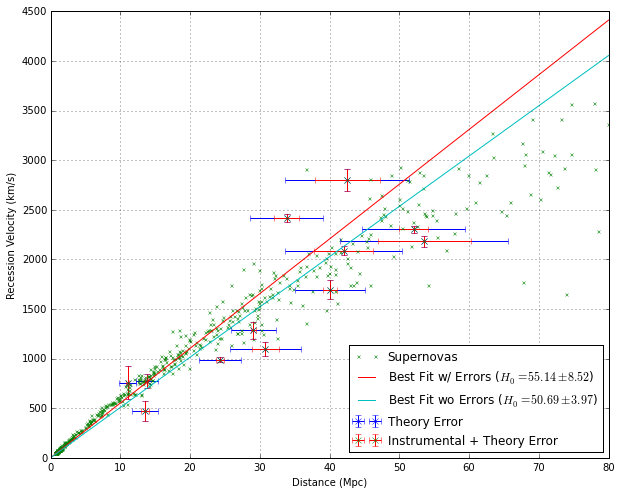

In [249]:
plt.grid()
plt.xlabel("Distance (Mpc)") #x axis label 
plt.ylabel("Recession Velocity (km/s)") #y axis label 
plt.plot(np.power(10,data_sn[:,2]/5)/10000000,data_sn[:,1]*3000,"gx",markersize=3,label="Supernovas")

plt.errorbar(tp2[:,0],tp2[:,1],xerr = tp2[:,2],yerr=tp2[:,3],fmt='x', ecolor='b',label="Theory Error")
plt.errorbar(tp[:,0],tp[:,1],xerr = tp[:,2],yerr=tp[:,3],fmt='x', ecolor='r',label="Instrumental + Theory Error")
plt.plot([0,80],np.array([0,80])*55.14745,label="Best Fit w/ Errors ($H_0 = 55.14 \pm 8.52$)")
plt.plot([0,80],np.array([0,80])*50.69,label="Best Fit wo Errors ($H_0 = 50.69 \pm 3.97$)")
plt.rcParams['figure.figsize'] = (10.0, 8.0) #makes plot bigger!
plt.legend(loc=4)
plt.xlim((0,80))

(0, 80)

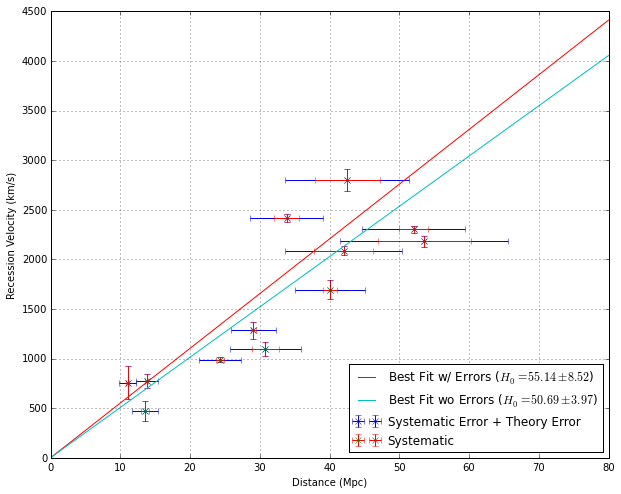

In [251]:
plt.grid()
plt.xlabel("Distance (Mpc)") #x axis label 
plt.ylabel("Recession Velocity (km/s)") #y axis label 
#plt.plot(np.power(10,data_sn[:,2]/5)/10000000,data_sn[:,1]*3000,"g.",markersize=1.5,label="Supernovas")

plt.errorbar(tp2[:,0],tp2[:,1],xerr = tp2[:,2],yerr=tp2[:,3],fmt='x', ecolor='b',label="Systematic Error + Theory Error")
plt.errorbar(tp[:,0],tp[:,1],xerr = tp[:,2],yerr=tp[:,3],fmt='x', ecolor='r',label="Systematic")
plt.plot([0,80],np.array([0,80])*55.14745,label="Best Fit w/ Errors ($H_0 = 55.14 \pm 8.52$)")
plt.plot([0,80],np.array([0,80])*50.69,label="Best Fit wo Errors ($H_0 = 50.69 \pm 3.97$)")
plt.rcParams['figure.figsize'] = (10.0, 8.0) #makes plot bigger!
plt.legend(loc=4)
plt.xlim((0,80))

In [241]:
from scipy import stats #stats is a particular subpackage from scipy
slope, _, _, _, std_err = stats.linregress(tp[:,0],tp[:,1]) 
print slope,std_err

45.6250143918 8.58646808431


In [199]:
from scipy.odr import *
def quad_func(p, x):
     m,c = p
     return m*x
lin_fit = Model(quad_func)
data = RealData(tp2[:,0], tp2[:,1])#,sx=tp2[:,2],sy=tp2[:,3])
odr = ODR(data, lin_fit, beta0=[50.,0])

# Run the regression.
out = odr.run()

# Use the in-built pprint method to give us results.
out.pprint()

Beta: [ 50.69158932   0.        ]
Beta Std Error: [ 3.43052246  0.        ]
Beta Covariance: [[ 0.18248626  0.        ]
 [ 0.          0.        ]]
Residual Variance: 64.4897026401
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence


In [203]:
data_sn = np.genfromtxt("./sn_data.txt")

In [247]:
from scipy.odr import *
def quad_func(p, x):
     m,c = p
     return m*x
lin_fit = Model(quad_func)
data = RealData(np.power(10,data_sn[:,2]/5)/10000000,data_sn[:,1]*3000)#,sx=tp2[:,2],sy=tp2[:,3])
odr = ODR(data, lin_fit, beta0=[50.,0])

# Run the regression.
out = odr.run()

# Use the in-built pprint method to give us results.
out.pprint()

Beta: [ 46.47036846   0.        ]
Beta Std Error: [ 0.35430334  0.        ]
Beta Covariance: [[ 0.00375933  0.        ]
 [ 0.          0.        ]]
Residual Variance: 33.3917827976
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence
